In [5]:
import pandas as pd

# Define the trigger words to change column
start_trigger = 'TRANSLATION'
stop_trigger = 'PURPORT'
with open('BhagvadGita.txt', 'r') as f:
    text = f.read()
    
lines = text.split('\n')
data = []
row = {}

# Initialize a flag to track whether a new entry has started
new_entry = False

# Loop over each line of text
for line in lines:
    if start_trigger in line:
        if new_entry:
            data.append(row)
        row = {start_trigger: line.split(start_trigger)[1].strip()}
        new_entry = True
    # Check if the stop trigger word is in the line
    elif stop_trigger in line:
        if new_entry:
            data.append(row)
            new_entry = False
    # If neither trigger word is in the line, add the line to the current row of data as a continuation of the previous value
    else:
        if new_entry:
            column_name = list(row.keys())[-1]
            row[column_name] += ' ' + line.strip()

df = pd.DataFrame(data)
#df.to_excel('chapter1.xlsx', index=False)

In [6]:
# Deep Cleaning the rows

# Define the word to look for and the column to check
word_to_remove = 'TEXT'
column_to_check = 'TRANSLATION'

for i, row in df.iterrows():
    if word_to_remove in str(row[column_to_check]):
        df.at[i, column_to_check] = row[column_to_check].split(word_to_remove)[0]
        
# Add a new column called 'Verse' with unique values
df['Verse'] = ['Verse {}'.format(i+1) for i in range(len(df))]

#Rearranging the Column
df = df[['Verse','TRANSLATION']]

# Export the modified DataFrame to a new Excel file
df.to_excel('Gita.xlsx', index=False)

In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('Gita.xlsx')

# Create a new instance of the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply the VADER sentiment analyzer to each row of the 'Translation' column
df['Sentiment'] = df['TRANSLATION'].apply(lambda x: sid.polarity_scores(x)['compound'])
df.to_excel('data_with_sentiment.xlsx', index=False)

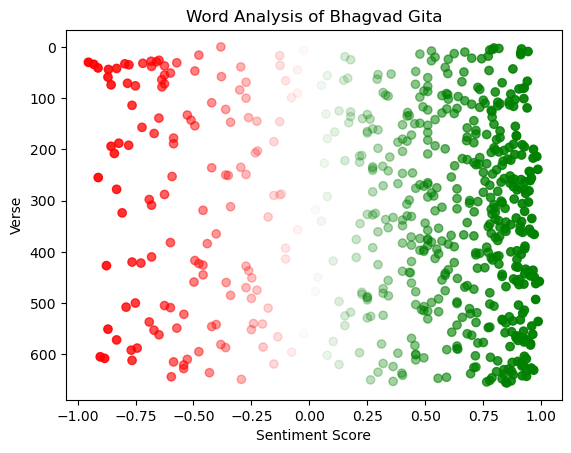

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('data_with_sentiment.xlsx')

colors = np.where(df['Sentiment'] > 0, 'green', np.where(df['Sentiment'] < 0, 'red', 'gray'))
fade = np.abs(df['Sentiment'])

plt.scatter(df['Sentiment'], range(len(df)), c=colors, cmap='cool', alpha=fade)

# Invert the y-axis
plt.gca().invert_yaxis()

# Set the axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Verse')
plt.title('Word Analysis of Bhagvad Gita')

plt.show()
